In [209]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import pymc3 as pm
import theano


data = pickle.load(open("../data/filled_data2.pkl", "rb"))

test = data["Page"].unique()


#[page.split(".") in page for page in data["Page"]]
#data["Page"].split(".")


truths = ['Martin_Luther_King_Jr._Day_en' in page for page in data["Page"]]
# for page in data["Page"]:
#     page in 'Francisco_el_matemático'
np.array(truths).sum()
for page in data[(truths)]["Page"]:
    print(page)
example = data[(truths)]
example

Martin_Luther_King_Jr._Day_en.wikipedia.org_desktop_all-agents
Martin_Luther_King_Jr._Day_en.wikipedia.org_all-access_spider
Martin_Luther_King_Jr._Day_en.wikipedia.org_all-access_all-agents
Martin_Luther_King_Jr._Day_en.wikipedia.org_mobile-web_all-agents


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
12536,Martin_Luther_King_Jr._Day_en.wikipedia.org_de...,18.0,15.0,13.0,19.0,7.0,16.0,26.0,14.0,16.0,...,258.0,161.0,178.0,358.0,289.0,261.0,279.0,221.0,181.0,191.0
36362,Martin_Luther_King_Jr._Day_en.wikipedia.org_al...,7.0,15.0,5.0,11.0,5.0,8.0,21.0,8.0,9.0,...,35.0,36.0,30.0,79.0,42.0,33.0,32.0,30.0,41.0,25.0
41274,Martin_Luther_King_Jr._Day_en.wikipedia.org_al...,21.0,22.0,17.0,26.0,7.0,21.0,28.0,15.0,21.0,...,485.0,358.0,416.0,678.0,563.0,529.0,513.0,448.0,355.0,362.0
76728,Martin_Luther_King_Jr._Day_en.wikipedia.org_mo...,3.0,7.0,3.0,5.0,0.0,5.0,2.0,1.0,5.0,...,216.0,191.0,233.0,313.0,259.0,254.0,224.0,224.0,169.0,169.0


In [210]:
test_set = example.iloc[:,-72:]
test_set

,2017-07-01,2017-07-02,2017-07-03,2017-07-04,2017-07-05,2017-07-06,2017-07-07,2017-07-08,2017-07-09,2017-07-10,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
12536,122.0,141.0,223.0,254.0,227.0,243.0,220.0,145.0,154.0,278.0,...,258.0,161.0,178.0,358.0,289.0,261.0,279.0,221.0,181.0,191.0
36362,11.0,20.0,11.0,24.0,25.0,20.0,46.0,28.0,16.0,35.0,...,35.0,36.0,30.0,79.0,42.0,33.0,32.0,30.0,41.0,25.0
41274,346.0,366.0,450.0,524.0,441.0,448.0,370.0,308.0,351.0,449.0,...,485.0,358.0,416.0,678.0,563.0,529.0,513.0,448.0,355.0,362.0
76728,222.0,221.0,221.0,263.0,203.0,200.0,145.0,160.0,191.0,165.0,...,216.0,191.0,233.0,313.0,259.0,254.0,224.0,224.0,169.0,169.0


In [211]:
train_set = example.iloc[:,:-72]
train_set

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-06-21,2017-06-22,2017-06-23,2017-06-24,2017-06-25,2017-06-26,2017-06-27,2017-06-28,2017-06-29,2017-06-30
12536,Martin_Luther_King_Jr._Day_en.wikipedia.org_de...,18.0,15.0,13.0,19.0,7.0,16.0,26.0,14.0,16.0,...,226.0,215.0,183.0,144.0,123.0,203.0,194.0,232.0,212.0,207.0
36362,Martin_Luther_King_Jr._Day_en.wikipedia.org_al...,7.0,15.0,5.0,11.0,5.0,8.0,21.0,8.0,9.0,...,19.0,18.0,15.0,19.0,13.0,22.0,12.0,28.0,21.0,34.0
41274,Martin_Luther_King_Jr._Day_en.wikipedia.org_al...,21.0,22.0,17.0,26.0,7.0,21.0,28.0,15.0,21.0,...,402.0,429.0,360.0,302.0,317.0,388.0,385.0,400.0,404.0,428.0
76728,Martin_Luther_King_Jr._Day_en.wikipedia.org_mo...,3.0,7.0,3.0,5.0,0.0,5.0,2.0,1.0,5.0,...,173.0,211.0,173.0,157.0,189.0,182.0,188.0,163.0,179.0,217.0


In [212]:
train = train[train["ds"] != "2016-03-05"]
train = train[train["ds"] != "2016-03-06"]

In [213]:
dates = test_set.columns
temp = np.array(test_set.iloc[-1:,:]).reshape(len(dates),1)
test = pd.DataFrame({'ds':list(dates), 'y':[int(item) for item in temp]})

In [214]:

for k in train_set["Page"]:
    temp = train_set[train_set["Page"] == k]
    temp = np.array(temp).reshape(len(temp.columns),1)
#     temp = pd.DataFrame(temp)
print(temp)
dates = train_set.columns
dates[1:]
temp[1:]
list(dates[1:])
[int(item) for item in temp[1:]]
train = pd.DataFrame({'ds':list(dates[1:]), 'y':[int(item) for item in temp[1:]]})
# dates
# temp

[['Martin_Luther_King_Jr._Day_en.wikipedia.org_mobile-web_all-agents']
 [3.0]
 [7.0]
 [3.0]
 [5.0]
 [0.0]
 [5.0]
 [2.0]
 [1.0]
 [5.0]
 [2.0]
 [7.0]
 [4.0]
 [2.0]
 [1.0]
 [1.0]
 [2.0]
 [2.0]
 [2.0]
 [3.0]
 [4.0]
 [5.0]
 [5.0]
 [2.0]
 [3.0]
 [1.0]
 [3.0]
 [1.0]
 [3.0]
 [0.0]
 [2.0]
 [0.0]
 [1.0]
 [3.0]
 [2.0]
 [3.0]
 [4.0]
 [2.0]
 [2.0]
 [4.0]
 [3.0]
 [3.0]
 [3.0]
 [2.0]
 [1.0]
 [3.0]
 [3.0]
 [0.0]
 [2.0]
 [0.0]
 [0.0]
 [0.0]
 [3.0]
 [3.0]
 [1.0]
 [0.0]
 [1.0]
 [1.0]
 [4.0]
 [1.0]
 [1.0]
 [3.0]
 [2.0]
 [6.0]
 [0.0]
 [5.0]
 [1.0]
 [0.0]
 [4.0]
 [4.0]
 [3.0]
 [5.0]
 [3.0]
 [0.0]
 [1.0]
 [3.0]
 [1.0]
 [5.0]
 [3.0]
 [2.0]
 [1.0]
 [1.0]
 [0.0]
 [2.0]
 [0.0]
 [3.0]
 [1.0]
 [2.0]
 [1.0]
 [0.0]
 [2.0]
 [2.0]
 [0.0]
 [0.0]
 [6.0]
 [2.0]
 [1.0]
 [4.0]
 [3.0]
 [1.0]
 [31.0]
 [6.0]
 [2.0]
 [5.0]
 [7.0]
 [8.0]
 [3.0]
 [4.0]
 [1.0]
 [2.0]
 [1.0]
 [2.0]
 [1.0]
 [1.0]
 [3.0]
 [2.0]
 [1.0]
 [3.0]
 [3.0]
 [2.0]
 [1.0]
 [3.0]
 [3.0]
 [2.0]
 [0.0]
 [3.0]
 [1.0]
 [2.0]
 [3.0]
 [1.0]
 [1.0]
 [1.0]
 [2.0]
 [2.

In [201]:
train = train[train["ds"] != "2016-03-05"]
train = train[train["ds"] != "2016-03-06"]

In [202]:
len(train[train["ds"] != "2016-03-06"])

729

In [203]:
len(train)

729

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/leaferickson/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


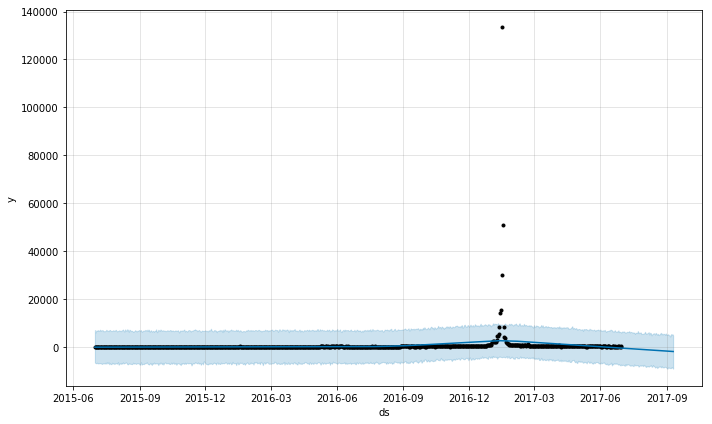

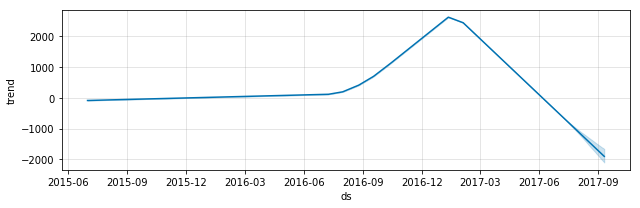

In [215]:
m = Prophet(yearly_seasonality = False, weekly_seasonality = False)
# m.add_seasonality(name='monthly', period=450, fourier_order=30)
m.fit(train)
future = m.make_future_dataframe(periods=72)
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig = m.plot_components(forecast)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/leaferickson/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


House_of_Cards_(U.S._TV_series)_en.wikipedia.org_desktop_all-agents
7302137.580706258


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


House_of_Cards_(U.S._TV_series)_en.wikipedia.org_all-access_spider
4937.662882888253
House_of_Cards_(U.S._TV_series)_en.wikipedia.org_all-access_all-agents


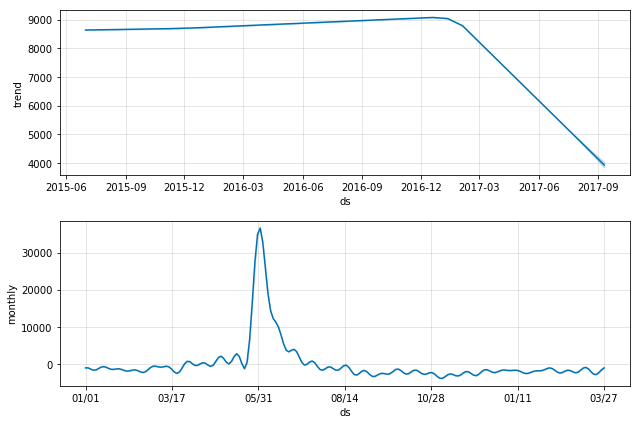

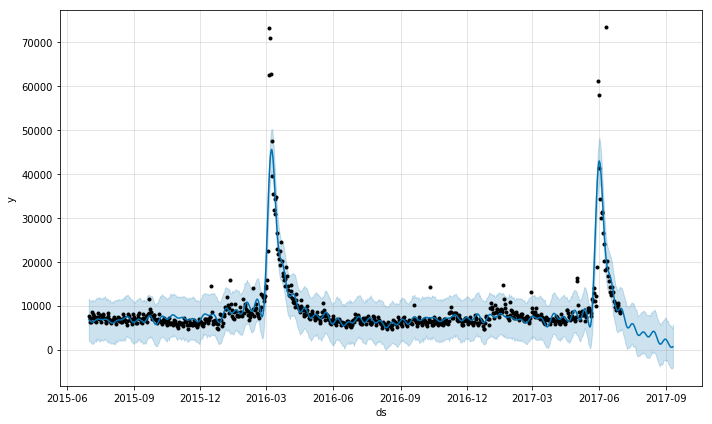

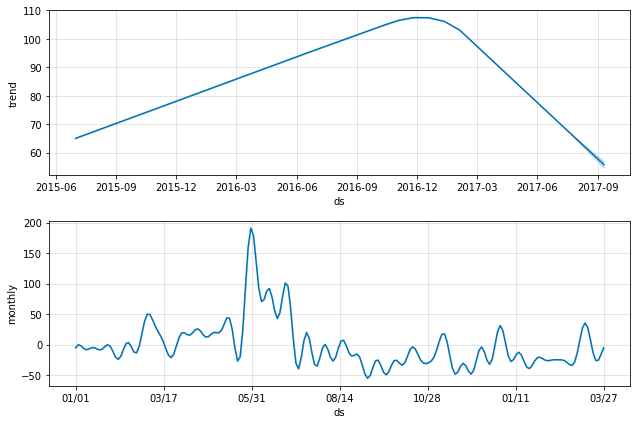

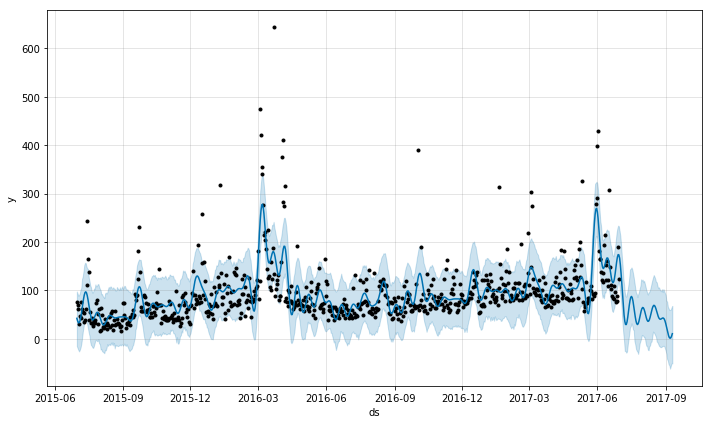

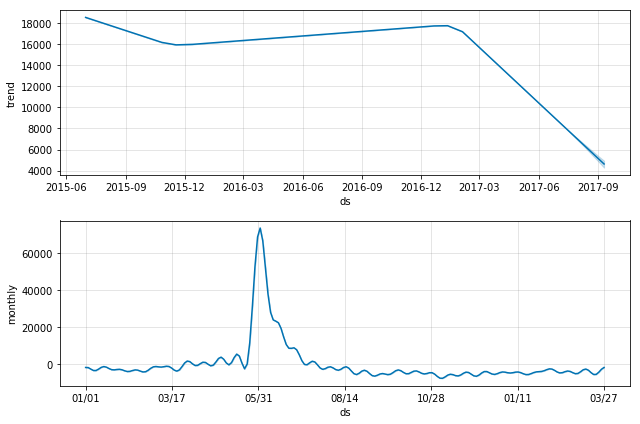

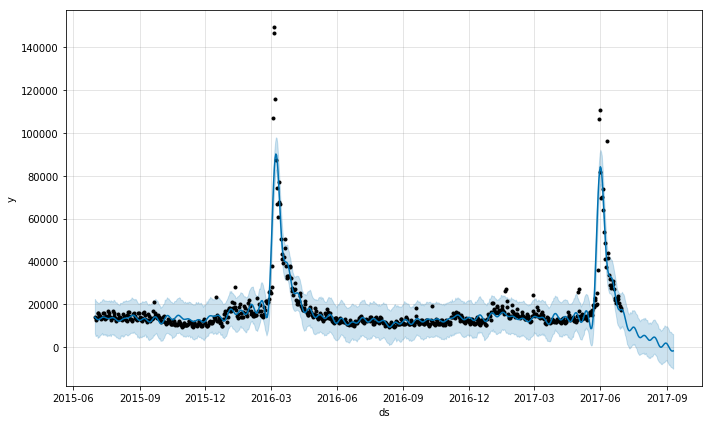

In [166]:
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

count = 0
dates = train_set.columns
#Separate Prophet Models
for k in example["Page"]:
    individual_page = example[example["Page"] == k]
    train_set = individual_page.iloc[:,:-72]
    test_set = individual_page.iloc[:,-72:]
    train = np.array(train_set).reshape(len(train_set.columns),1)
    train = pd.DataFrame({'ds':list(dates[1:]), 'y':[int(item) for item in train[1:]]})
    test = np.array(test_set).reshape(len(test_set.columns),1)
    
    m = Prophet(yearly_seasonality = False, weekly_seasonality = False)
    m.add_seasonality(name='monthly', period=450, fourier_order=30)
    m.fit(train)
    future = m.make_future_dataframe(periods=72)
    forecast = m.predict(future)
    fig = m.plot_components(forecast)
    print(k)
#     forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# weekly_seasonality = False

    fig1 = m.plot(forecast)
    count += 1
    if count == 3:
        break

    #Error
#     print(forecast.iloc[-72:,-1:])
#     print(test)
    print(mean_squared_error(test, forecast.iloc[-72:,-1:]))

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/leaferickson/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


House_of_Cards_(U.S._TV_series)_en.wikipedia.org_desktop_all-agents
74333292.73719849


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


House_of_Cards_(U.S._TV_series)_en.wikipedia.org_all-access_spider
1510.1015206509696
House_of_Cards_(U.S._TV_series)_en.wikipedia.org_all-access_all-agents


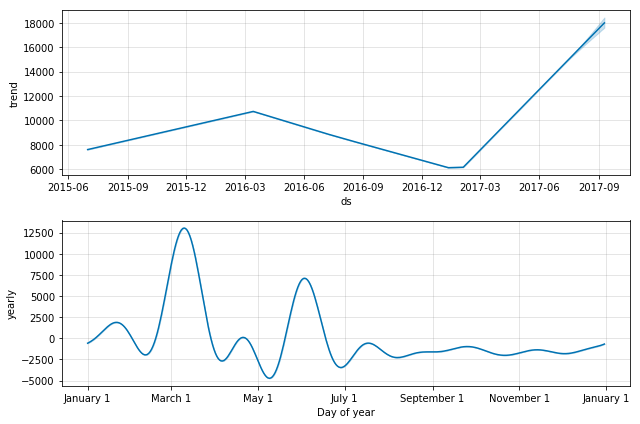

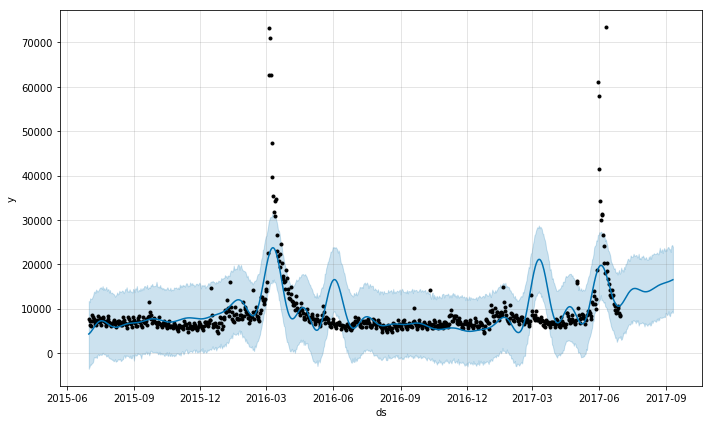

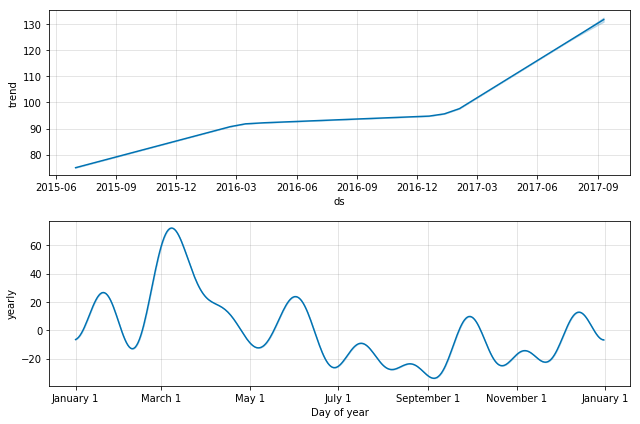

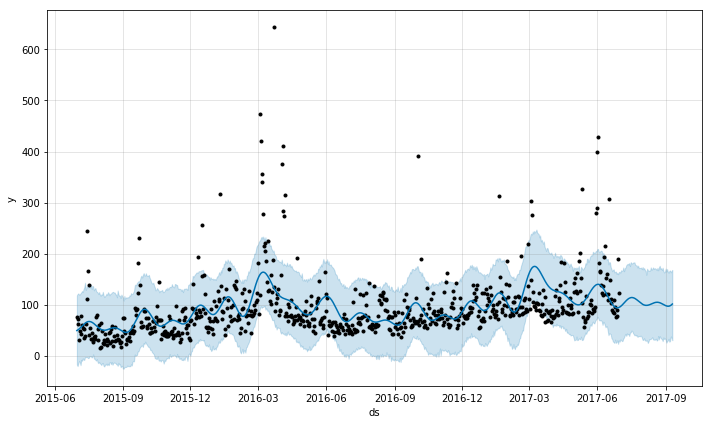

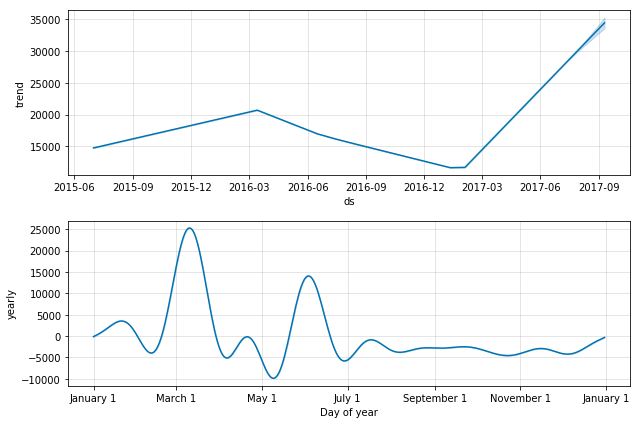

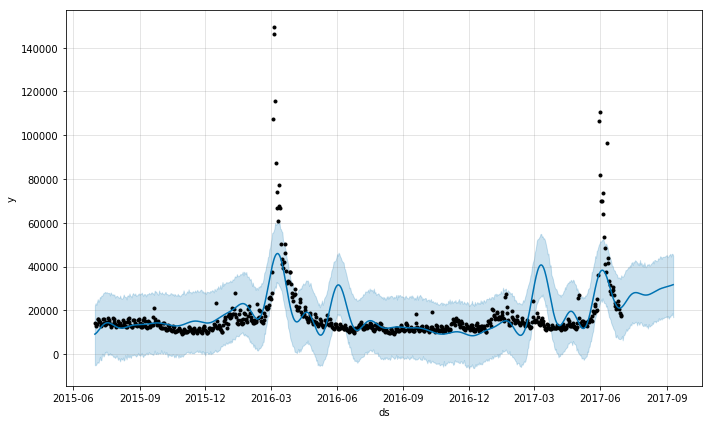

In [150]:
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

count = 0
dates = train_set.columns
#Separate Prophet Models
for k in example["Page"]:
    individual_page = example[example["Page"] == k]
    train_set = individual_page.iloc[:,:-72]
    test_set = individual_page.iloc[:,-72:]
    train = np.array(train_set).reshape(len(train_set.columns),1)
    train = pd.DataFrame({'ds':list(dates[1:]), 'y':[int(item) for item in train[1:]]})
    test = np.array(test_set).reshape(len(test_set.columns),1)
    
    m = Prophet(weekly_seasonality = False)
    m.fit(train)
    future = m.make_future_dataframe(periods=72)
    forecast = m.predict(future)
    fig = m.plot_components(forecast)
    print(k)
#     forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# weekly_seasonality = False

    fig1 = m.plot(forecast)
    count += 1
    if count == 3:
        break

    #Error
#     print(forecast.iloc[-72:,-1:])
#     print(test)
    print(mean_squared_error(test, forecast.iloc[-72:,-1:]))

In [153]:
pickle.dump(forecast.iloc[-72:,-1:], open("../data/tree_forecast.pkl","wb"))
forecast.iloc[-72:,-1:]

,yhat
731,21497.995117
732,21832.260285
733,22228.485345
734,22673.935091
735,23155.638766
736,23660.699375
737,24176.586159
738,24691.403872
739,25194.133335
740,25674.838709


In [159]:
prophet_ouput = forecast[["yhat", "yhat_lower", "yhat_upper"]]

In [160]:
pickle.dump(prophet_ouput, open("../data/prophet_ouput.pkl","wb"))

In [105]:
fig1.plt.title("Forecasting Franciso el Matematico's Page Views")
fig1.savefig("Fig1.jpg")

AttributeError: 'Figure' object has no attribute 'plt'

In [96]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,2.962665,-25.576000,28.309754,2.962665,2.962665,-2.052134,-2.052134,-2.052134,-2.052134,-2.052134,-2.052134,0.0,0.0,0.0,0.910531
1,2015-07-02,3.140797,-24.416015,26.421150,3.140797,3.140797,-2.409001,-2.409001,-2.409001,-2.409001,-2.409001,-2.409001,0.0,0.0,0.0,0.731796
2,2015-07-03,3.318928,-24.408982,31.198907,3.318928,3.318928,0.459342,0.459342,0.459342,0.459342,0.459342,0.459342,0.0,0.0,0.0,3.778270
3,2015-07-04,3.497060,-17.133187,36.296618,3.497060,3.497060,5.855038,5.855038,5.855038,5.855038,5.855038,5.855038,0.0,0.0,0.0,9.352098
4,2015-07-05,3.675191,-18.812475,34.826592,3.675191,3.675191,4.254644,4.254644,4.254644,4.254644,4.254644,4.254644,0.0,0.0,0.0,7.929835
5,2015-07-06,3.853323,-25.830953,26.114245,3.853323,3.853323,-4.038677,-4.038677,-4.038677,-4.038677,-4.038677,-4.038677,0.0,0.0,0.0,-0.185355
6,2015-07-07,4.031454,-24.037909,27.354872,4.031454,4.031454,-2.069212,-2.069212,-2.069212,-2.069212,-2.069212,-2.069212,0.0,0.0,0.0,1.962242
7,2015-07-08,4.209585,-24.870966,29.526485,4.209585,4.209585,-2.052134,-2.052134,-2.052134,-2.052134,-2.052134,-2.052134,0.0,0.0,0.0,2.157451
8,2015-07-09,4.387717,-24.082537,27.852331,4.387717,4.387717,-2.409001,-2.409001,-2.409001,-2.409001,-2.409001,-2.409001,0.0,0.0,0.0,1.978716
9,2015-07-10,4.565848,-22.200092,31.465771,4.565848,4.565848,0.459342,0.459342,0.459342,0.459342,0.459342,0.459342,0.0,0.0,0.0,5.025190


Text(0.5,1,'Preds vs. Actuals')

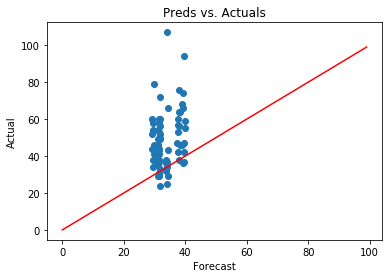

In [97]:
plt.scatter(forecast.iloc[-72:,-1:], test)
plt.plot(range(100), range(100), color = "red")
plt.xlabel("Forecast")
plt.ylabel("Actual")
plt.title("Preds vs. Actuals")

In [44]:
###Build a hierarchical model
test_set
train_set

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-06-21,2017-06-22,2017-06-23,2017-06-24,2017-06-25,2017-06-26,2017-06-27,2017-06-28,2017-06-29,2017-06-30
55826,EGOIST_ja.wikipedia.org_mobile-web_all-agents,403.0,370.0,383.0,426.0,446.0,413.0,364.0,348.0,337.0,...,592.0,538.0,482.0,633.0,715.0,663.0,524.0,657.0,685.0,509.0
84783,EGOIST_ja.wikipedia.org_desktop_all-agents,217.0,189.0,189.0,295.0,254.0,244.0,250.0,218.0,214.0,...,341.0,249.0,243.0,387.0,362.0,337.0,334.0,347.0,320.0,320.0
118732,EGOIST_ja.wikipedia.org_all-access_all-agents,623.0,561.0,576.0,722.0,701.0,660.0,616.0,571.0,554.0,...,939.0,790.0,734.0,1028.0,1087.0,1006.0,859.0,1007.0,1013.0,832.0
131980,EGOIST_ja.wikipedia.org_all-access_spider,20.0,1.0,3.0,6.0,0.0,1.0,8.0,8.0,4.0,...,24.0,15.0,23.0,22.0,41.0,48.0,42.0,25.0,43.0,29.0


In [45]:
page_idx = train_set["Page"]
page_idx

55826     EGOIST_ja.wikipedia.org_mobile-web_all-agents
84783        EGOIST_ja.wikipedia.org_desktop_all-agents
118732    EGOIST_ja.wikipedia.org_all-access_all-agents
131980        EGOIST_ja.wikipedia.org_all-access_spider
Name: Page, dtype: object

In [46]:
dates = test_set.columns
temp = np.array(test_set.iloc[-1:,:]).reshape(len(dates),1)
test = pd.DataFrame({'ds':list(dates), 'y':[int(item) for item in temp]})

count = 0
for k in train_set["Page"]:
    temp = train_set[train_set["Page"] == k]
    temp = np.array(temp).reshape(len(temp.columns),1)
    non_dated_table = add_AR_terms(temp[1:], 7)
    dates = train_set.columns
    hierarchical_col = [count]* (len(dates) - 1)
    dated_table1 = np.column_stack((dates[1:], hierarchical_col, non_dated_table))
    if count == 0:
        dated_table2 = dated_table1
    else:
        dated_table2 = np.ma.row_stack((dated_table2, dated_table1))
#     train = pd.DataFrame({'ds':list(dates[1:]), 'y':[int(item) for item in temp[1:]]})
    count += 1
hierarchical_df = pd.DataFrame(dated_table2)
hierarchical_df.columns = ["date", "page", "target", "ar1", "ar2", "ar3", "ar4", "ar5", "ar6", "ar7"]
hierarchical_df = hierarchical_df.dropna()
hierarchical_df.head()

,date,page,target,ar1,ar2,ar3,ar4,ar5,ar6,ar7
7,2015-07-08,0,348,364,413,446,426,383,370,403
8,2015-07-09,0,337,348,364,413,446,426,383,370
9,2015-07-10,0,326,337,348,364,413,446,426,383
10,2015-07-11,0,353,326,337,348,364,413,446,426
11,2015-07-12,0,397,353,326,337,348,364,413,446


In [169]:
ok = np.array((1,2,3,4,5,6))
ok
# np.hstack((np.nan, ok[1:]))
np.repeat(np.nan,2)

array([nan, nan])

In [191]:
 [2] * 5

[2, 2, 2, 2, 2]

In [284]:
np.array(hierarchical_df["target"].values).astype(int)

array([348, 337, 326, ...,  25,  43,  29])

In [16]:
np.array(hierarchical_df.iloc[:,3]).astype(int)

array([364, 348, 337, ...,  42,  25,  43])

In [48]:
np.array(hierarchical_df.iloc[:,3:])

array([[364.0, 413.0, 446.0, ..., 383.0, 370.0, 403.0],
       [348.0, 364.0, 413.0, ..., 426.0, 383.0, 370.0],
       [337.0, 348.0, 364.0, ..., 446.0, 426.0, 383.0],
       ...,
       [42.0, 48.0, 41.0, ..., 23.0, 15.0, 24.0],
       [25.0, 42.0, 48.0, ..., 22.0, 23.0, 15.0],
       [43.0, 25.0, 42.0, ..., 41.0, 22.0, 23.0]], dtype=object)

In [58]:
# input_cols = hierarchical_df.iloc[:,3:]
# for col in input_cols:
#     print(input_cols[col]
# model_input = theano.shared(np.array(hierarchical_df.iloc[:,3:].astype(int)))
ars = theano.shared(np.array(hierarchical_df.iloc[:,3:]).astype(int))
ar1 = theano.shared(np.array(hierarchical_df.iloc[:,3]).astype(int))
ar2 = theano.shared(np.array(hierarchical_df.iloc[:,4:5]).flatten().astype(int))
ar3 = theano.shared(np.array(hierarchical_df.iloc[:,5:6]).flatten().astype(int))
ar4 = theano.shared(np.array(hierarchical_df.iloc[:,6:7]).flatten().astype(int))
ar5 = theano.shared(np.array(hierarchical_df.iloc[:,7:8]).flatten().astype(int))
ar6 = theano.shared(np.array(hierarchical_df.iloc[:,8:9]).flatten().astype(int))
ar7 = theano.shared(np.array(hierarchical_df.iloc[:,9:]).flatten().astype(int))
model_output = theano.shared(np.array(hierarchical_df["target"]).astype(int))
page_idx = theano.shared(np.array(hierarchical_df['page'].values).astype(int))
ars = ["ar1", "ar2", "ar3"]
ars

['ar1', 'ar2', 'ar3']

In [81]:
to_eval = ""
for thing in ars:
    to_eval = to_eval + "+ b[page_idx] * " + thing + " "
# to_eval = to_eval[:-3]
to_eval = b[page_idx] * ar4
# eval(to_eval)
eval("to_eval")

Elemwise{add,no_inplace}.0

In [90]:
ok = "testerrr"
eval("ok")

'testerrr'

In [82]:
with pm.Model() as hierarchical_model:
    # Hyperpriors
    mu_a = pm.Normal('mu_alpha', mu=0., sd=10e2)
    sigma_a = pm.HalfCauchy('sigma_alpha', beta=2)
    mu_b = pm.Normal('mu_beta',mu=0., sd = 10e2)
    sigma_b = pm.HalfCauchy('sigma_beta', beta=2)
    
    
    # Intercept for each county, distributed around group mean mu_a
    a = pm.Normal('alpha', mu=mu_a, sd=sigma_a, shape=len(hierarchical_df['page'].unique()))
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('beta', mu=mu_b, sd=sigma_b, shape=len(hierarchical_df['page'].unique()))
    
    # Model error
    eps = pm.Uniform('eps', .01, 10)
    
    # Expected value
    est = eval("to_eval")
    #   + b[page_idx] * ar2 + b[page_idx] * ar3 + b[page_idx] * ar4 + b[page_idx] * ar5 + b[page_idx] * ar6 + b[page_idx] * ar7
    
    # Data likelihood
    y = pm.Normal('y', mu=est, sd=eps, observed=model_output)
    
with hierarchical_model:
    # zipcode_0 - used for comparison later
    zip_0 = pm.Normal('zip_0', mu=a[2] + b[2], sd=eps)

In [349]:
with hierarchical_model:
    hierarchical_trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [zip_0, eps, beta, alpha, sigma_beta, mu_beta, sigma_alpha, mu_alpha]
Sampling 2 chains: 100%|██████████| 3000/3000 [05:39<00:00,  3.17draws/s]
/home/leaferickson/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The acceptance probability does not match the target. It is 0.9733501394038478, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9232504136200002, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maxim

In [347]:
# pm.traceplot(hierarchical_trace[-5:]);

In [350]:
pm.summary(hierarchical_trace)

/home/leaferickson/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu_alpha,26.021263,29.940551,2.632942e+00,0.291307,76.183172,1.225292,2.577195
mu_beta,-0.061531,0.926936,9.225068e-02,-0.983790,0.981459,1.006128,14.052571
alpha__0,35.253565,34.353593,3.435045e+00,0.903470,70.476398,1.000615,99.057898
alpha__1,19.333121,18.574929,1.856742e+00,0.766019,38.880603,1.000962,48.688578
alpha__2,44.435569,43.989563,4.398657e+00,0.449306,89.410675,1.000585,115.397497
alpha__3,5.400869,4.923783,4.906515e-01,0.497012,11.104788,1.005157,15.696087
beta__0,0.937798,0.035322,3.531621e-03,0.901292,0.973937,1.000702,74.130750
beta__1,0.623572,0.293449,2.934473e-02,0.330019,0.918865,1.000507,407.056760
beta__2,0.952707,0.027815,2.781132e-03,0.924084,0.981054,1.000643,87.961066
beta__3,0.279372,0.426142,4.260361e-02,-0.146648,0.724188,1.000825,59.137702


100%|██████████| 500/500 [00:05<00:00, 92.35it/s]


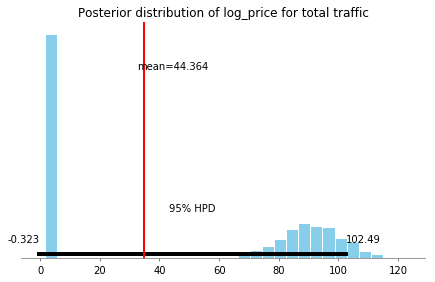

In [356]:
ppc = pm.sample_ppc(hierarchical_trace, model=hierarchical_model, samples=500)

pm.plot_posterior(hierarchical_trace, varnames=['zip_0'])
plt.title('Posterior distribution of log_price for total traffic')
plt.axvline(hierarchical_df.query('page == 3').target.mean(), c='red',linewidth=2);

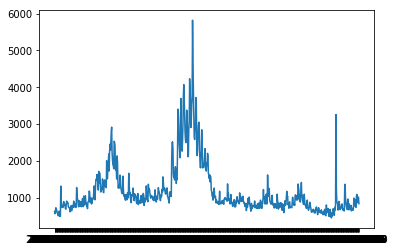

In [143]:
### Build (S)ARIMA model
ok = np.array(train_set.iloc[2:3,1:]).reshape(len(train_set.columns) - 1,1)
ok = [item[0] for item in ok]
ok = pd.DataFrame({'hits' : ok, 'dates' : dates[1:]})
plt.plot(ok["dates"], ok["hits"])

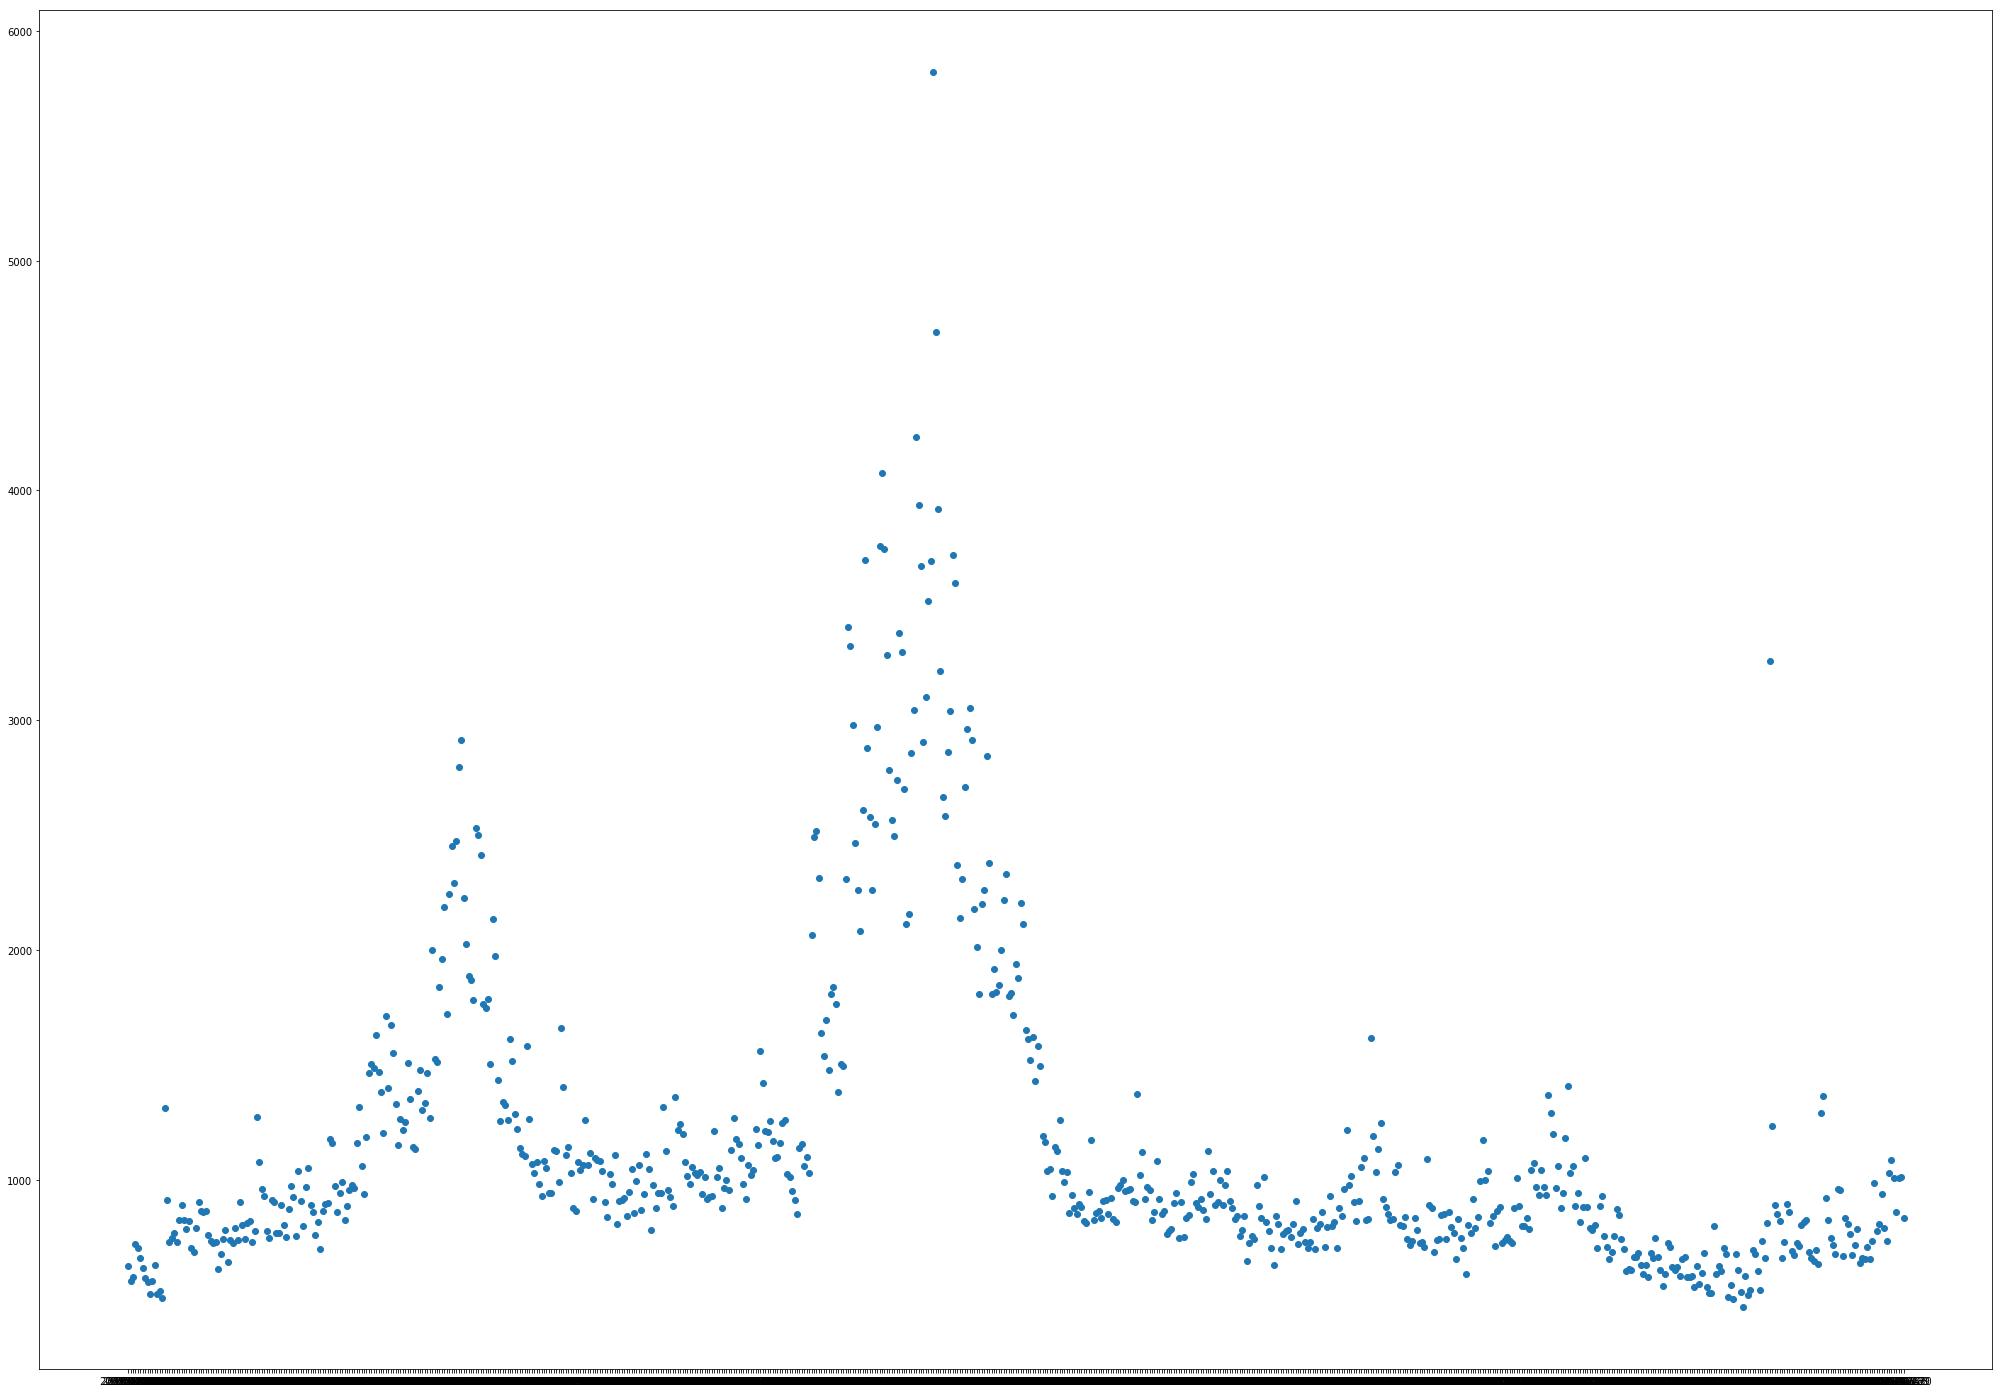

In [146]:
plt.figure(figsize = (35,25))
plt.scatter(ok["dates"], ok["hits"])

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

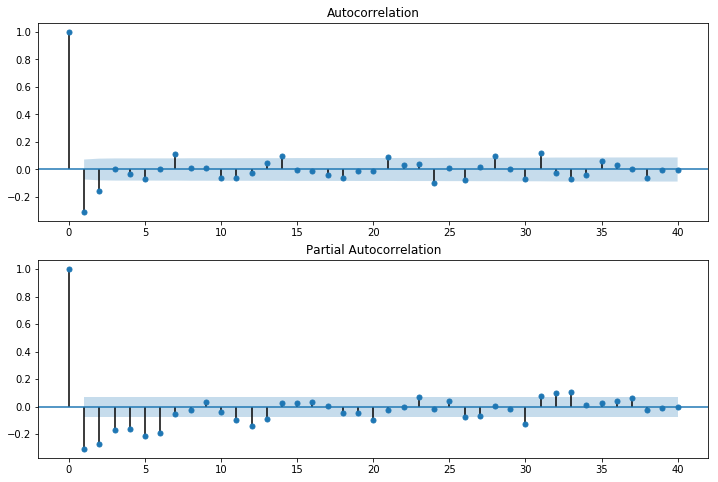

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['y'].diff()[1:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['y'].diff()[1:], lags=40, ax=ax2)
#plt.savefig("Fig1.png")
plt.show()

/home/leaferickson/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/leaferickson/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/leaferickson/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

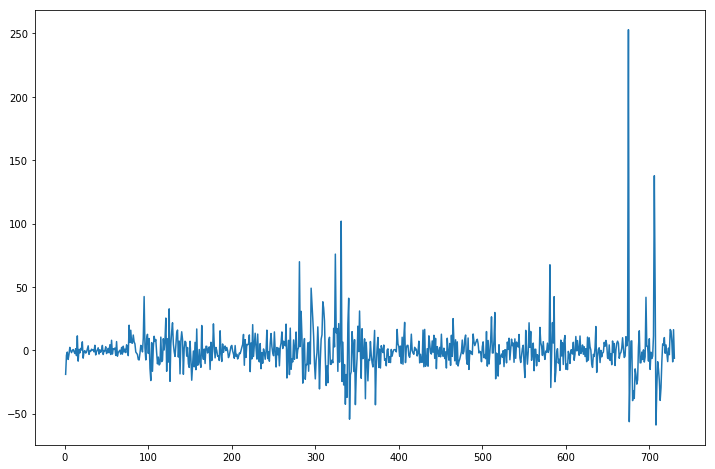

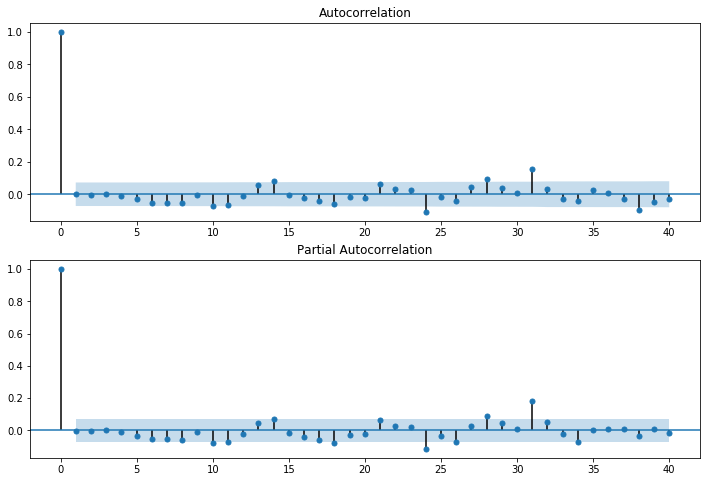

In [23]:
model=ARIMA(endog=train['y'],order=(7,1,0))
results=model.fit()
results.resid.plot(figsize=(12,8))
plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

In [41]:
forecast = results.forecast(steps = 72)[0]
error = mean_squared_error(test['y'], forecast)
print('Test MSE: %.3f' % error)

Test MSE: 391.067


In [43]:
forecast = pd.DataFrame(forecast)
forecast["page"] = "test"
forecast.rename(columns = {forecast.columns[0]:"preds"}, inplace = True)
forecast["test"] = forecast.index
forecast.head()

,preds,page,test
0,30.199945,test,0
1,35.259774,test,1
2,37.616598,test,2
3,36.608313,test,3
4,35.166459,test,4


In [ ]:
#Build XgBoost Model:
